In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *


In [6]:
path = os.path.expanduser("~/cg-training-set")
pics = get_image_files(path)
failed = verify_images(pics)
print("failed: ", failed)
print("pic count: ", len(pics))

failed:  []
pic count:  7213


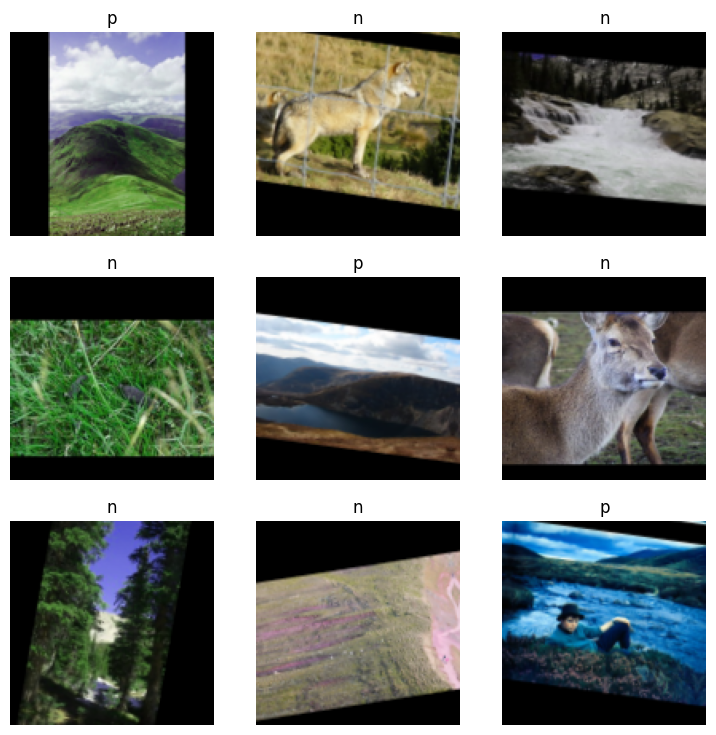

In [10]:
data_block_augmented = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[
        Resize(method="pad", pad_mode="zeros", size=128),
    ],
    batch_tfms=[
        Brightness(),
        Contrast(),
        Hue(),
        Rotate(),
    ]
)
dls_augmented = data_block_augmented.dataloaders(path)
dls_augmented.show_batch()

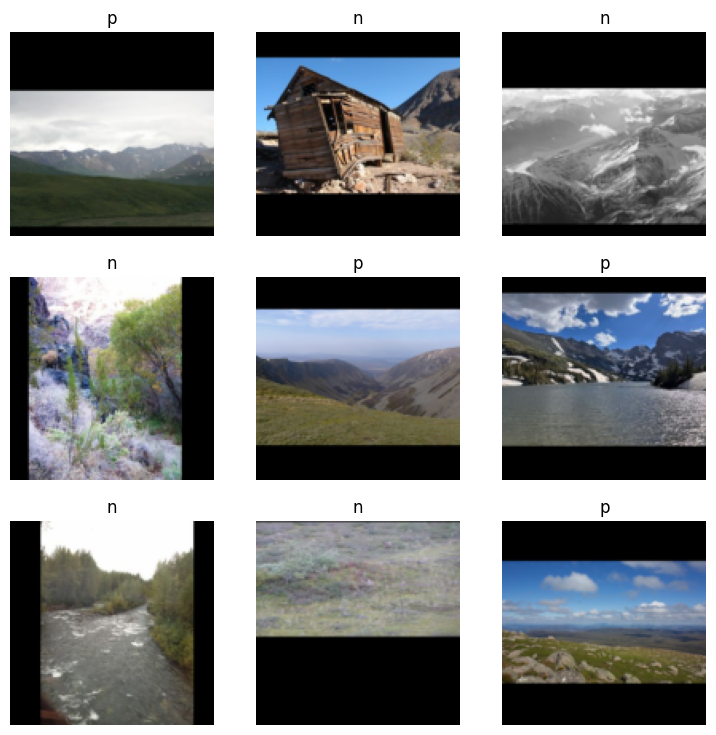

In [11]:
data_block_unaugmented = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[
        Resize(method="pad", pad_mode="zeros", size=128),
    ],
)
dls_unaugmented = data_block_unaugmented.dataloaders(path)
dls_unaugmented.show_batch()

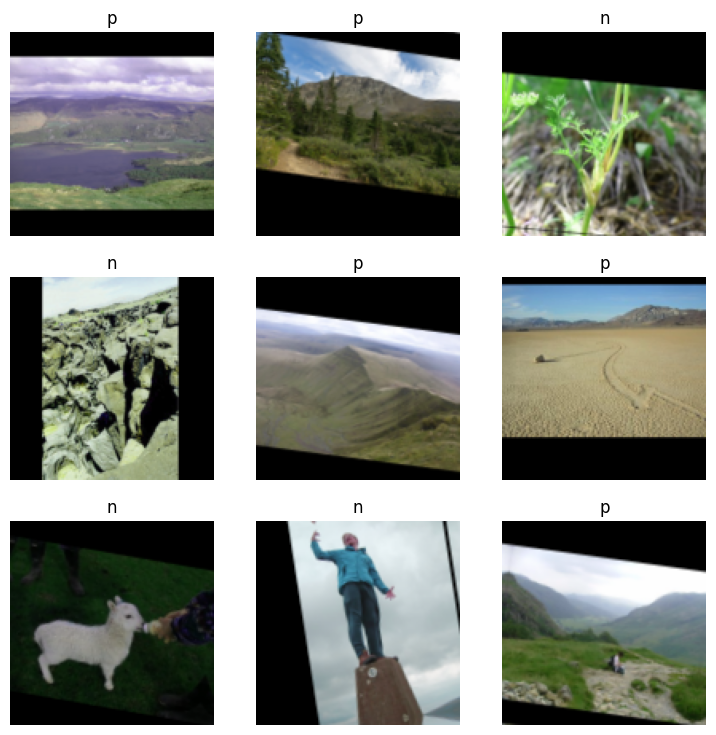

In [20]:
data_block_limited = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[
        Resize(method="pad", pad_mode="zeros", size=128),
    ],
    batch_tfms=[
        Brightness(),
        Rotate(max_deg=20),
    ]
)
dls_limited = data_block_augmented.dataloaders(path)
dls_limited.show_batch()

In [13]:
l_aug = vision_learner(dls_augmented, resnet18, metrics=[accuracy])
l_aug.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.810410,0.578753,0.766297,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.508959,0.395126,0.858530,00:36
1,0.395537,0.326744,0.871013,00:37
2,0.302467,0.290669,0.892510,00:39
3,0.218185,0.298983,0.884882,00:37
4,0.187319,0.302493,0.884882,00:37


In [14]:
l_un = vision_learner(dls_unaugmented, resnet18, metrics=[accuracy])
l_un.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.772412,0.481065,0.803051,00:24


epoch,train_loss,valid_loss,accuracy,time
0,0.499387,0.366661,0.856449,00:35
1,0.345553,0.347429,0.870319,00:39
2,0.252220,0.313940,0.877947,00:40
3,0.157620,0.330474,0.884882,00:42
4,0.118768,0.329571,0.883495,00:38


In [21]:
l_limited = vision_learner(dls_limited, resnet18, metrics=[accuracy])
l_limited.fine_tune(5) # at 5 we get .889, at 15 we get 0.9

epoch,train_loss,valid_loss,accuracy,time
0,0.782757,0.520600,0.781553,00:37


epoch,train_loss,valid_loss,accuracy,time
0,0.515207,0.356949,0.851595,00:48
1,0.388735,0.346930,0.861997,00:49
2,0.289989,0.296560,0.883495,00:48
3,0.229901,0.284033,0.892510,00:49
4,0.181209,0.281710,0.888350,00:48
